In [0]:
# импорт библиотек
from ludwig.api import *
import pandas as pd
from ludwig.visualize import *
import os
import kaggle

# Следущие три клетки по необходимости

In [0]:
kaggle.api.authenticate()

In [0]:
kaggle.api.dataset_download_files('kmader/skin-cancer-mnist-ham10000/')

In [0]:
!unzip skin-cancer-mnist-ham10000.zip

# Сам код

In [3]:
# Загрузка основного датасета из метадаты
metadata = pd.DataFrame(pd.read_csv('HAM10000_metadata.csv'))
# Создание столбца под картинки
metadata['path'] = ''
metadata.head(1)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,


In [0]:
# Загружаю пути на картинки из датасета 
# (тк по разным папкам лежат, то использую условные конструкции)
for i in metadata['image_id'].values.tolist():
    name = '{}.jpg'.format(i)
    if name in os.listdir('HAM10000_images_part_1'):
        metadata.loc[metadata['image_id'] == i, 'path'] = os.path.abspath('HAM10000_images_part_1/{}'.format(name))
    if name in os.listdir('HAM10000_images_part_2'):
        metadata.loc[metadata['image_id'] == i, 'path'] = os.path.abspath('HAM10000_images_part_2/{}'.format(name))

In [0]:
metadata.head(1)

In [0]:
# создаем модель
model = LudwigModel(model_definition_file='model_definition.yaml')

In [0]:
# тренировка
train = model.train(metadata)

## К сожалению, мощности моего компа не хватило на то, чтобы все заработало, надеюсь у вас все получится запустить (просто дальше не особо сложный код), поэтому все должно работать, если тренировка пройдет

UPD: Тренировка не прошла даже на сайте Kaggle.com через их ноутбуки (за 9 часов так и не прошло ничего), поэтому обучаю модель без картинок

In [5]:
# Загрузка основного датасета из метадаты
data_noim = pd.DataFrame(pd.read_csv('HAM10000_metadata.csv'))
data_noim.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [0]:
# создаем модель
model_noim = LudwigModel(model_definition_file='model_definition_noim.yaml')

In [0]:
# тренировка
train_noim = model_noim.train(data_noim)

In [8]:
# Создаем предсказания
predictions = model_noim.predict(data_noim)
predictions.head()

,dx_predictions,dx_probabilities_<UNK>,dx_probabilities_nv,dx_probabilities_mel,dx_probabilities_bkl,dx_probabilities_bcc,dx_probabilities_akiec,dx_probabilities_vasc,dx_probabilities_df,dx_probability
0,bkl,0.000050,0.125788,0.138430,0.291191,0.288857,0.150823,0.004077,0.000783,0.291191
1,bkl,0.000050,0.125788,0.138430,0.291191,0.288857,0.150823,0.004077,0.000783,0.291191
2,bkl,0.000050,0.125788,0.138430,0.291191,0.288857,0.150823,0.004077,0.000783,0.291191
3,bkl,0.000050,0.125788,0.138430,0.291191,0.288857,0.150823,0.004077,0.000783,0.291191
4,nv,0.000018,0.403542,0.369803,0.109800,0.068055,0.043313,0.004426,0.001043,0.403542


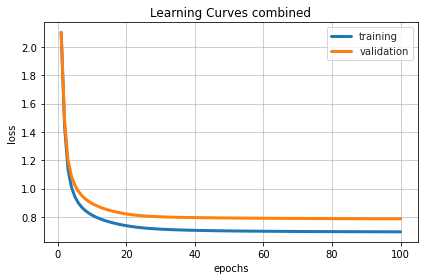

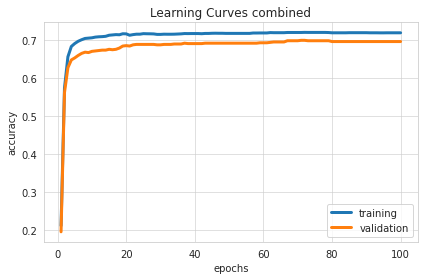

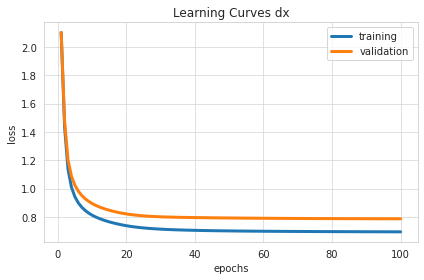

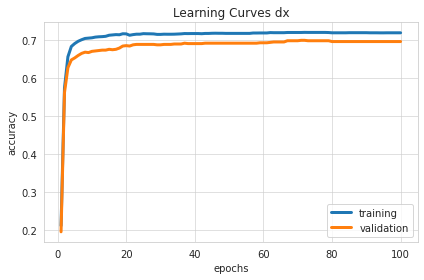

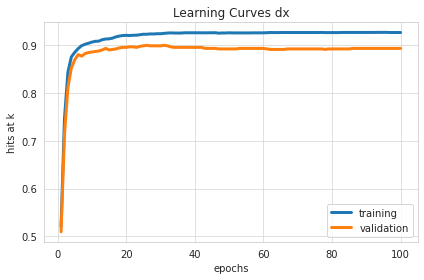

In [9]:
# красивые графики обучения модели
learning_curves(train_noim, 'localization')